In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from scipy.integrate import nquad
%matplotlib inline

In [2]:
def printer(name):
    base=np.genfromtxt(name+"(base-level5).txt",delimiter=',')
    ee=np.genfromtxt(name+"(e-level5).txt",delimiter=',')
    ef=np.genfromtxt(name+"(f-level5).txt",delimiter=',')
    eg=np.genfromtxt(name+"(g-level5).txt",delimiter=',')
    baserows=base.view([('',base.dtype)]*base.shape[1])
    eerows=ee.view([('',ee.dtype)]*ee.shape[1])
    efrows=ef.view([('',ef.dtype)]*ef.shape[1])
    egrows=eg.view([('',eg.dtype)]*eg.shape[1])
    eedif=np.setdiff1d(eerows,baserows).view(ee.dtype).reshape(-1,ee.shape[1])
    efdif=np.setdiff1d(efrows,baserows).view(ef.dtype).reshape(-1,ef.shape[1])
    egdif=np.setdiff1d(egrows,baserows).view(eg.dtype).reshape(-1,eg.shape[1])
    plt.figure(figsize=(5,5),dpi=300)
    plt.plot(base[:,0],base[:,1],".b")
    plt.plot(eedif[:,0],eedif[:,1],".r")

    plt.figure(figsize=(5,5),dpi=300)
    plt.plot(base[:,0],base[:,1],".b")
    plt.plot(efdif[:,0],efdif[:,1],".r")
    plt.figure(figsize=(5,5),dpi=300)
    plt.plot(base[:,0],base[:,1],".b")
    plt.plot(egdif[:,0],egdif[:,1],".r")
    df=pd.read_csv(name+".txt",header=None)
    ye=nquad(lambda x,y: (x**3-y**2),[[-1,1],[-1,1]])
    ye2=nquad(lambda x,y:1+(np.sin(x)+np.cos(y))/np.exp(y),[[-1,1],[-1,1]])
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('level')
    plt.plot(range(2,df.shape[1]+2),np.finfo(float).eps+abs(df.loc[1]-4),label='1.0')
    plt.plot(range(2,df.shape[1]+2),np.finfo(float).eps+abs(df.loc[0]-ye[0]),label='x^3-x^2')
    plt.plot(range(2,df.shape[1]+2),np.finfo(float).eps+abs(df.loc[2]-ye2[0]),label='1+(sin(x)+cos(x))/e^x')
    plt.legend()
    plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log')
    plt.xlabel('level')
    plt.plot(range(2,df.shape[1]+2),np.finfo(float).eps+abs(df.loc[4]),label='1.0')
    plt.plot(range(2,df.shape[1]+2),np.finfo(float).eps+abs(df.loc[3]),label='x^3-x^2')
    plt.plot(range(2,df.shape[1]+2),np.finfo(float).eps+abs(df.loc[5]),label='1+(sin(x)+cos(x))/e^x')
    plt.legend()
    plt.savefig(name+"_approximationsfehler.png")
    plt.show()


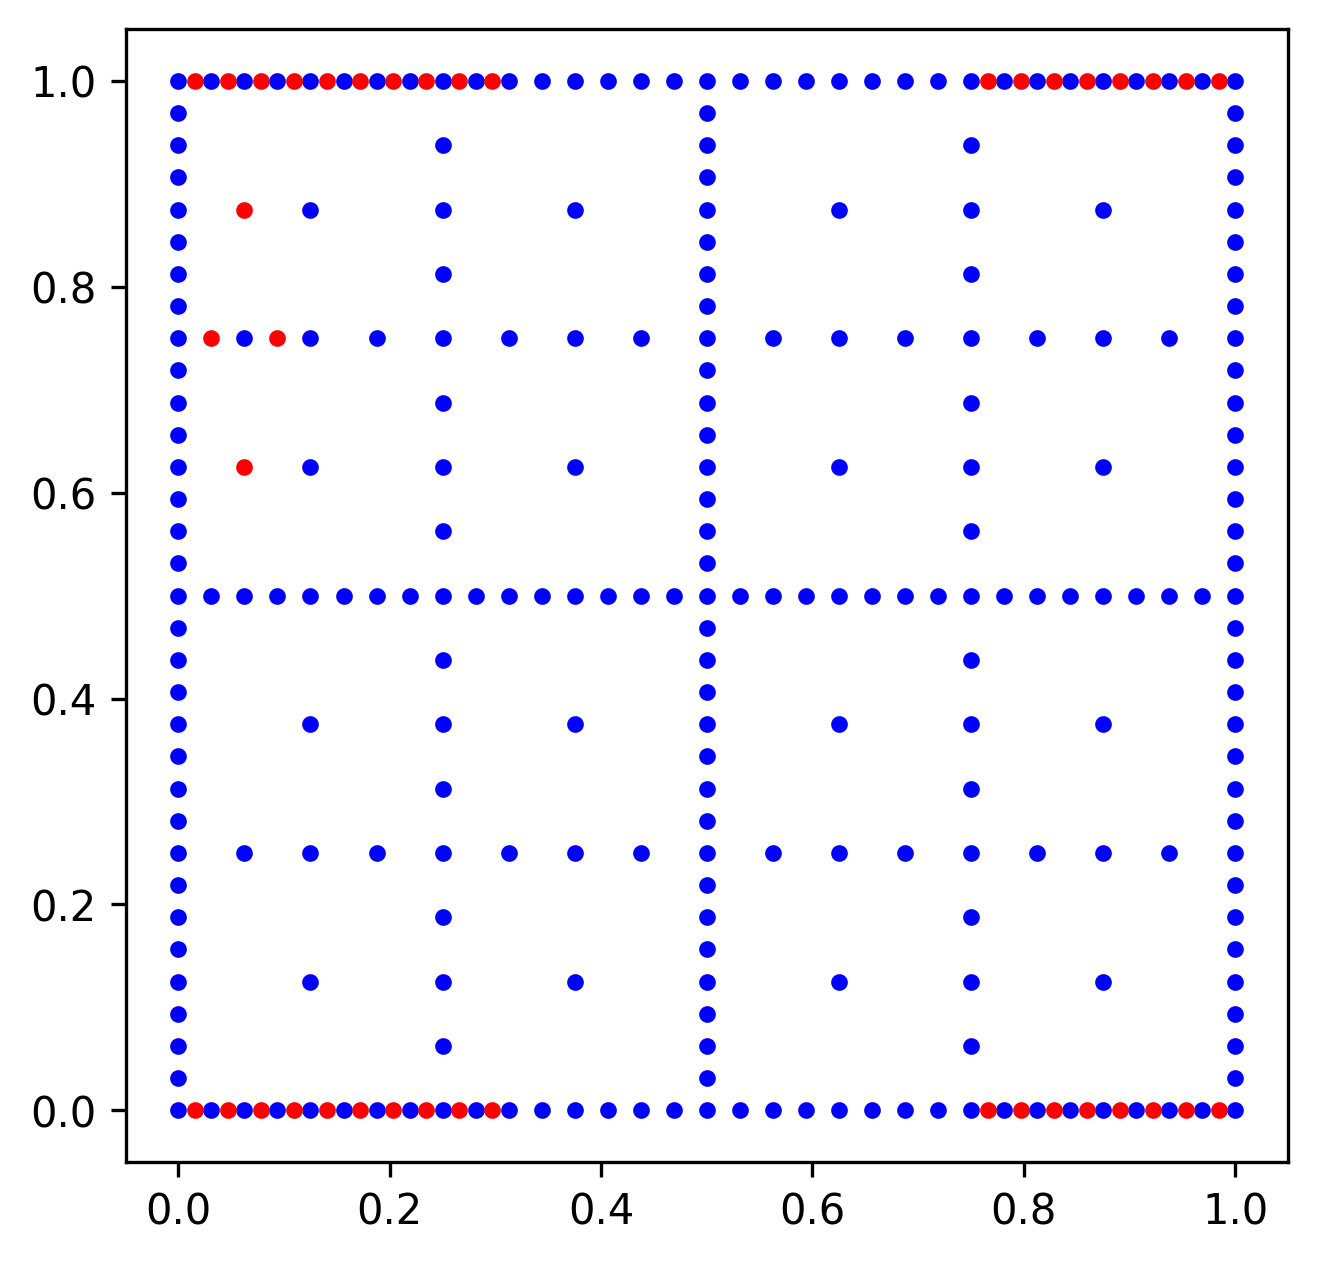

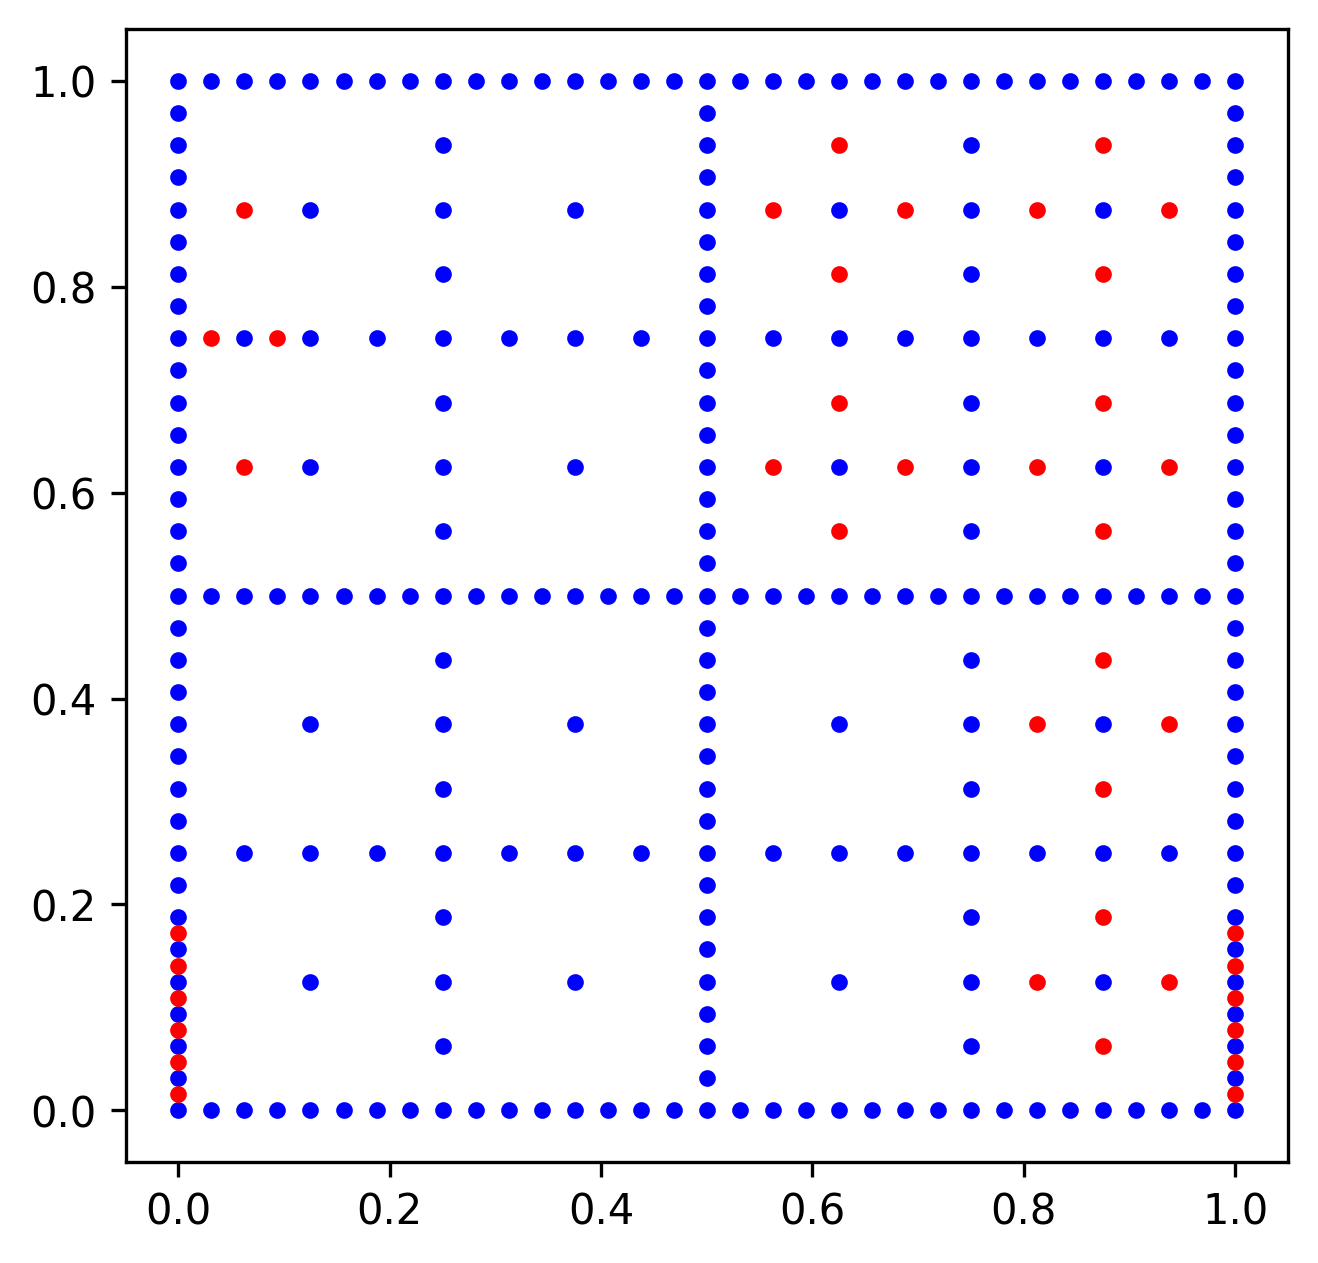

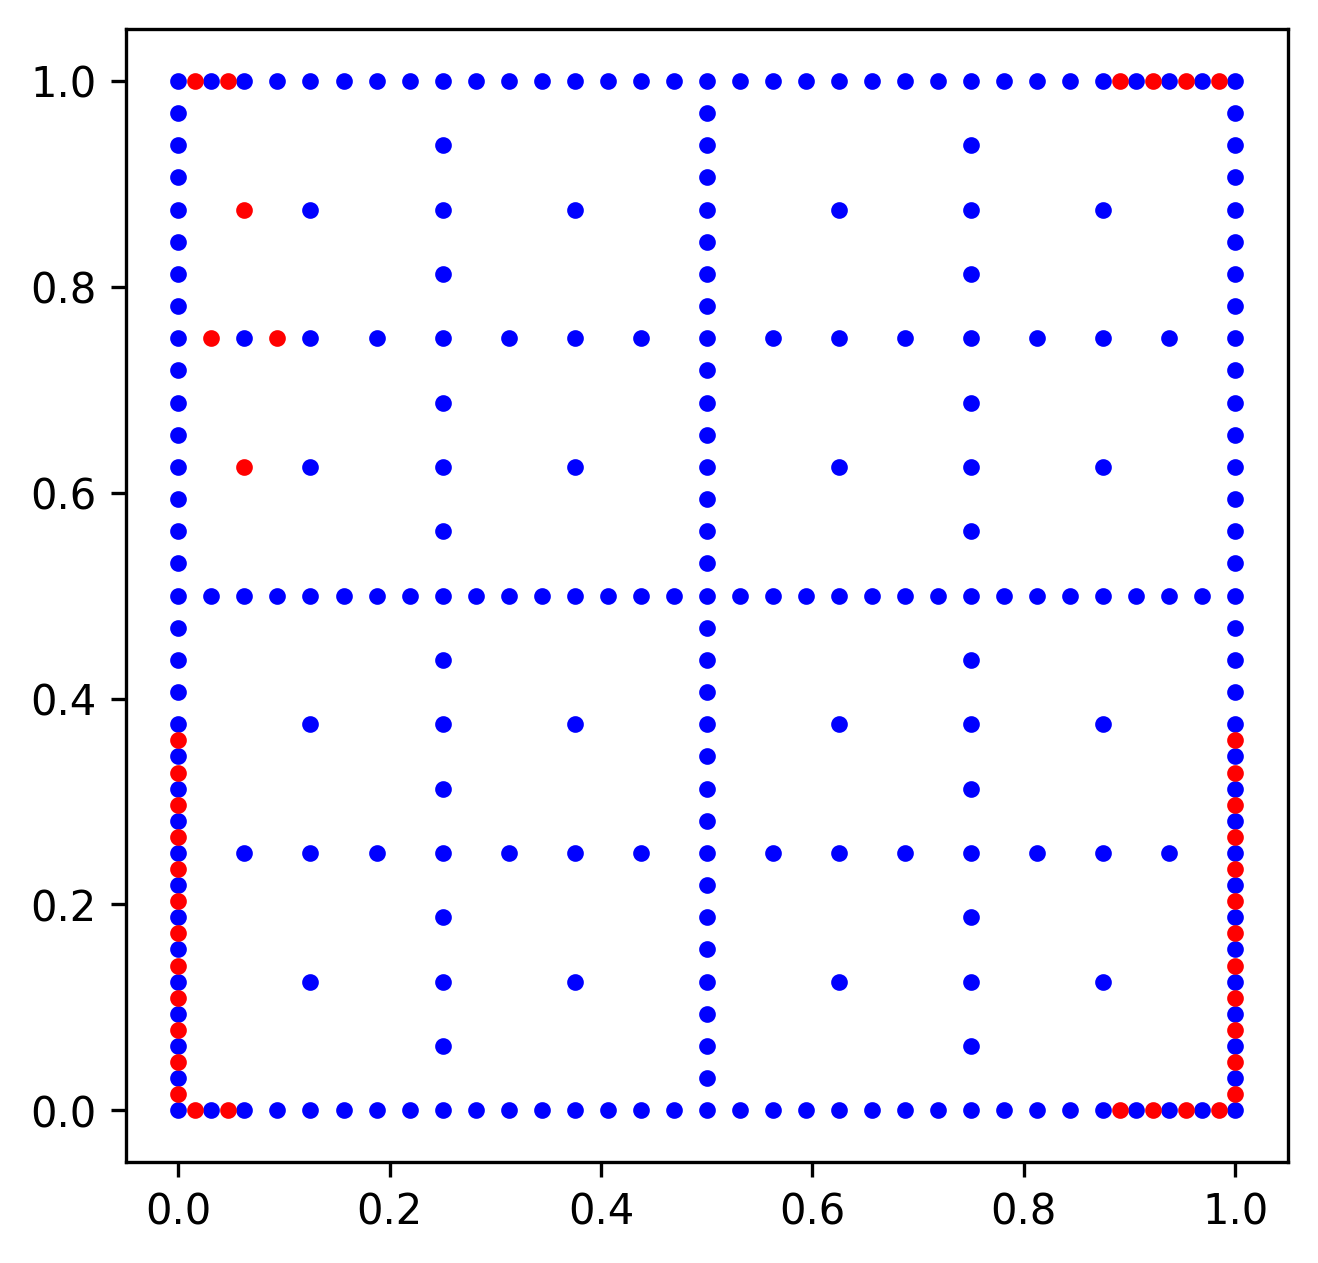

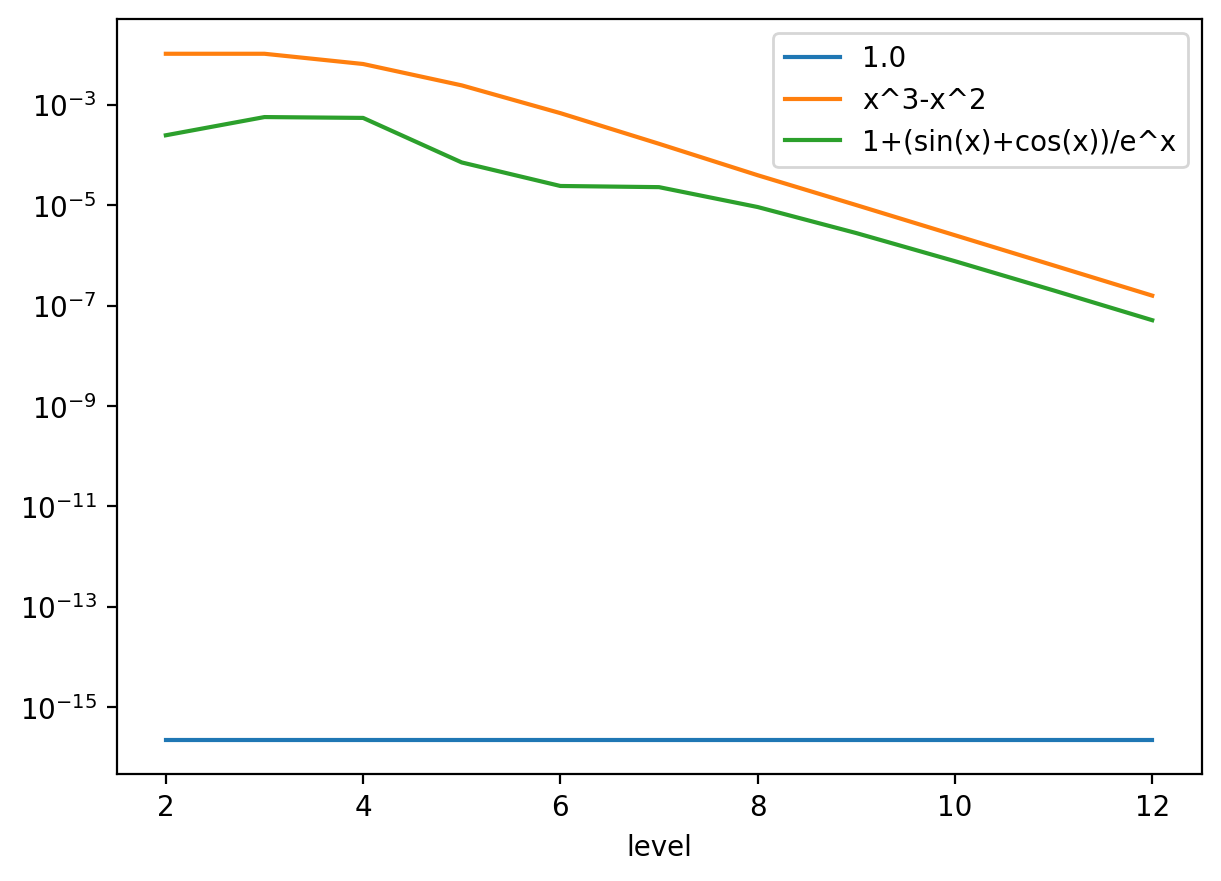

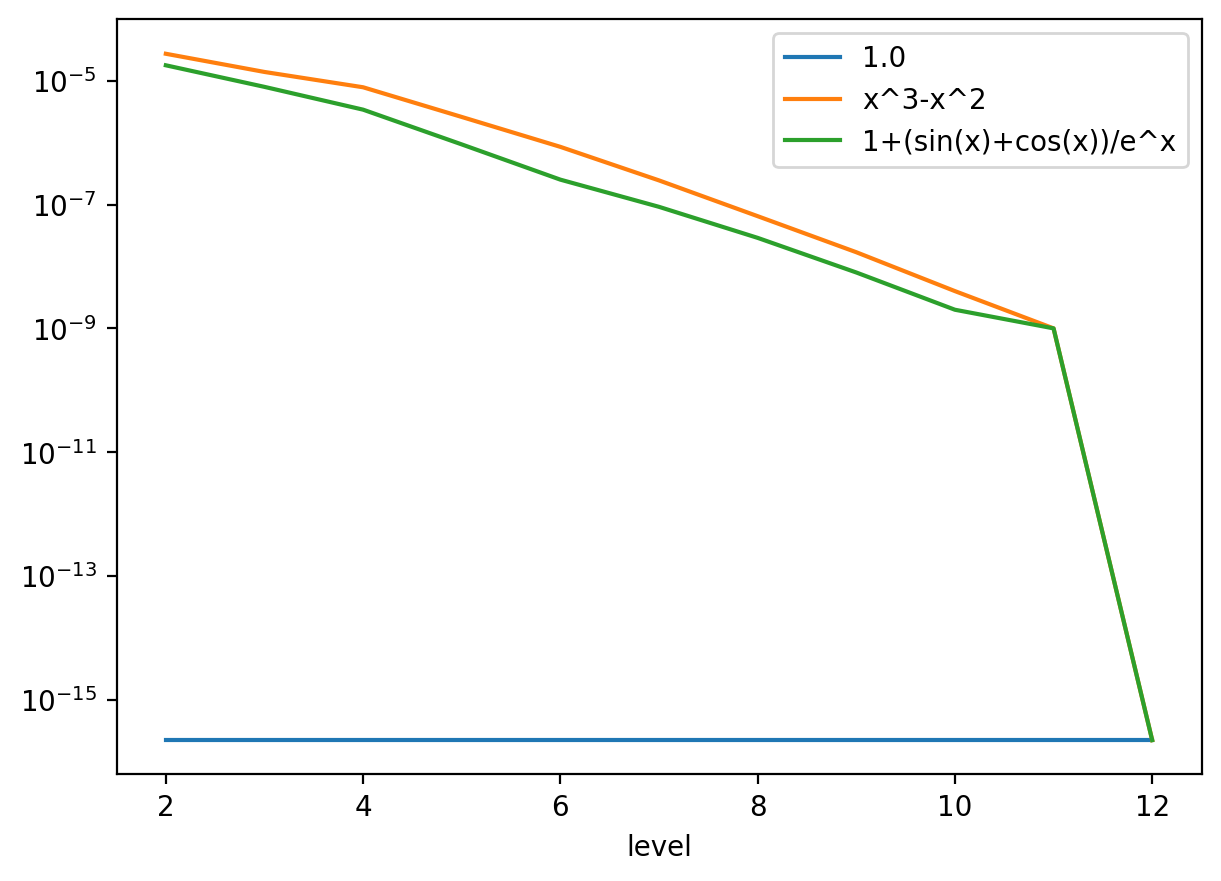

In [26]:
printer("LinearBoundary")

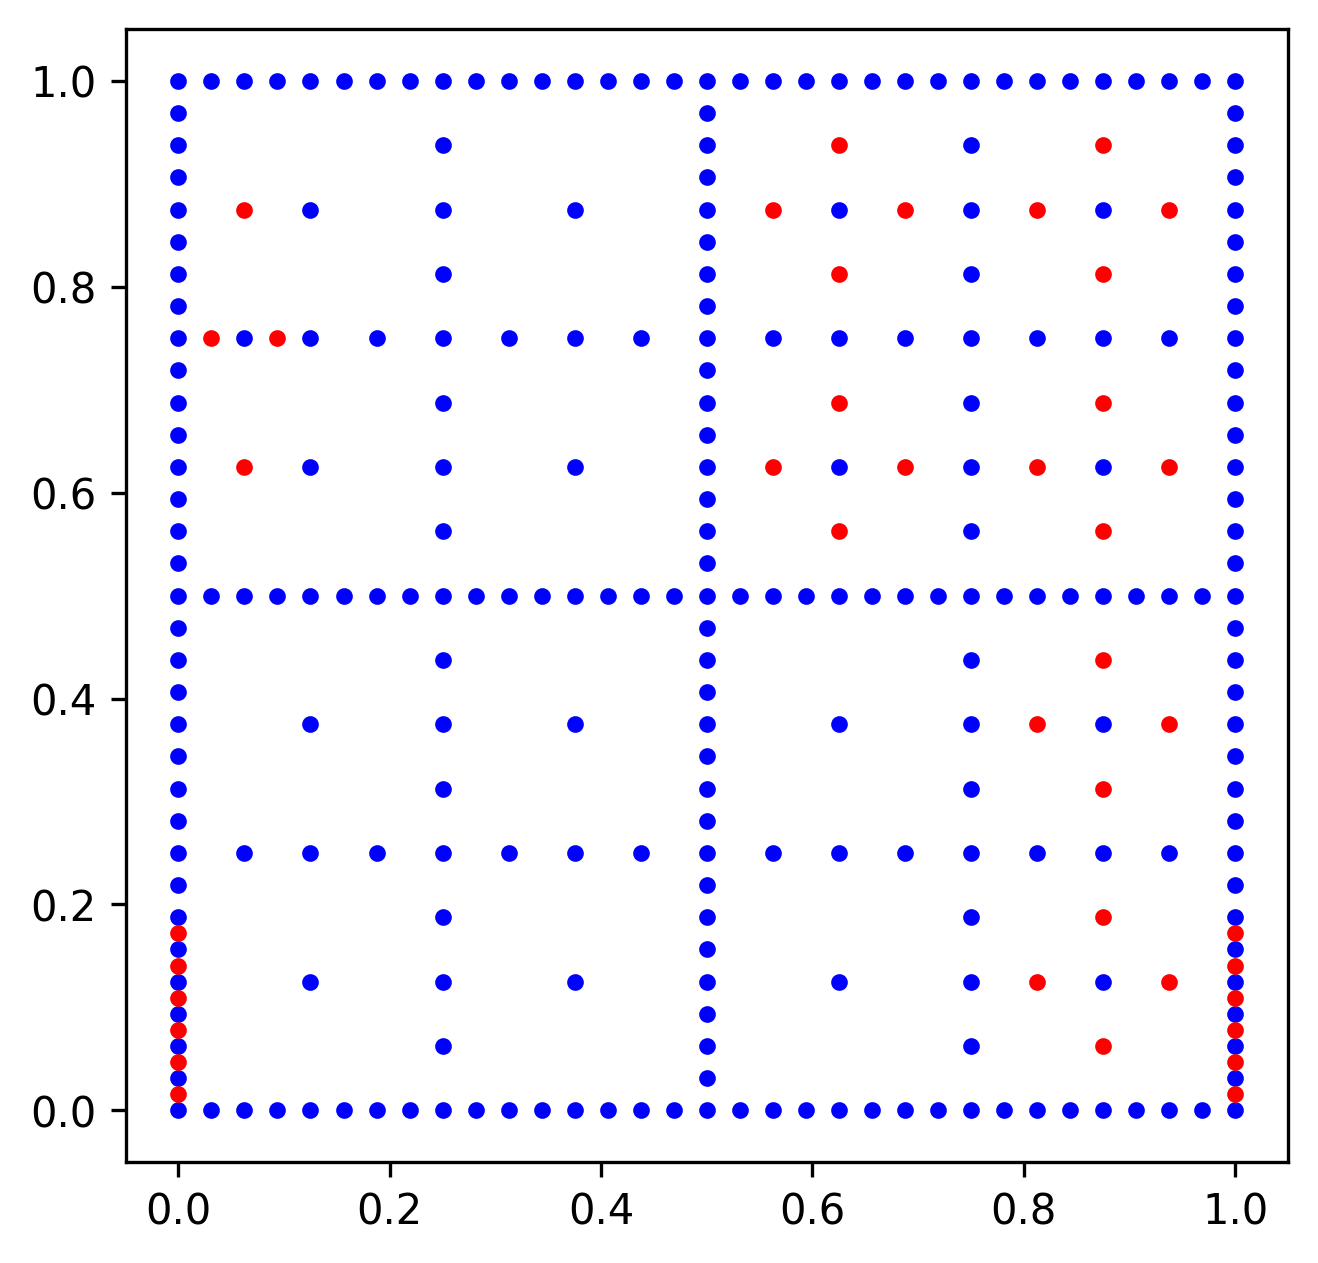

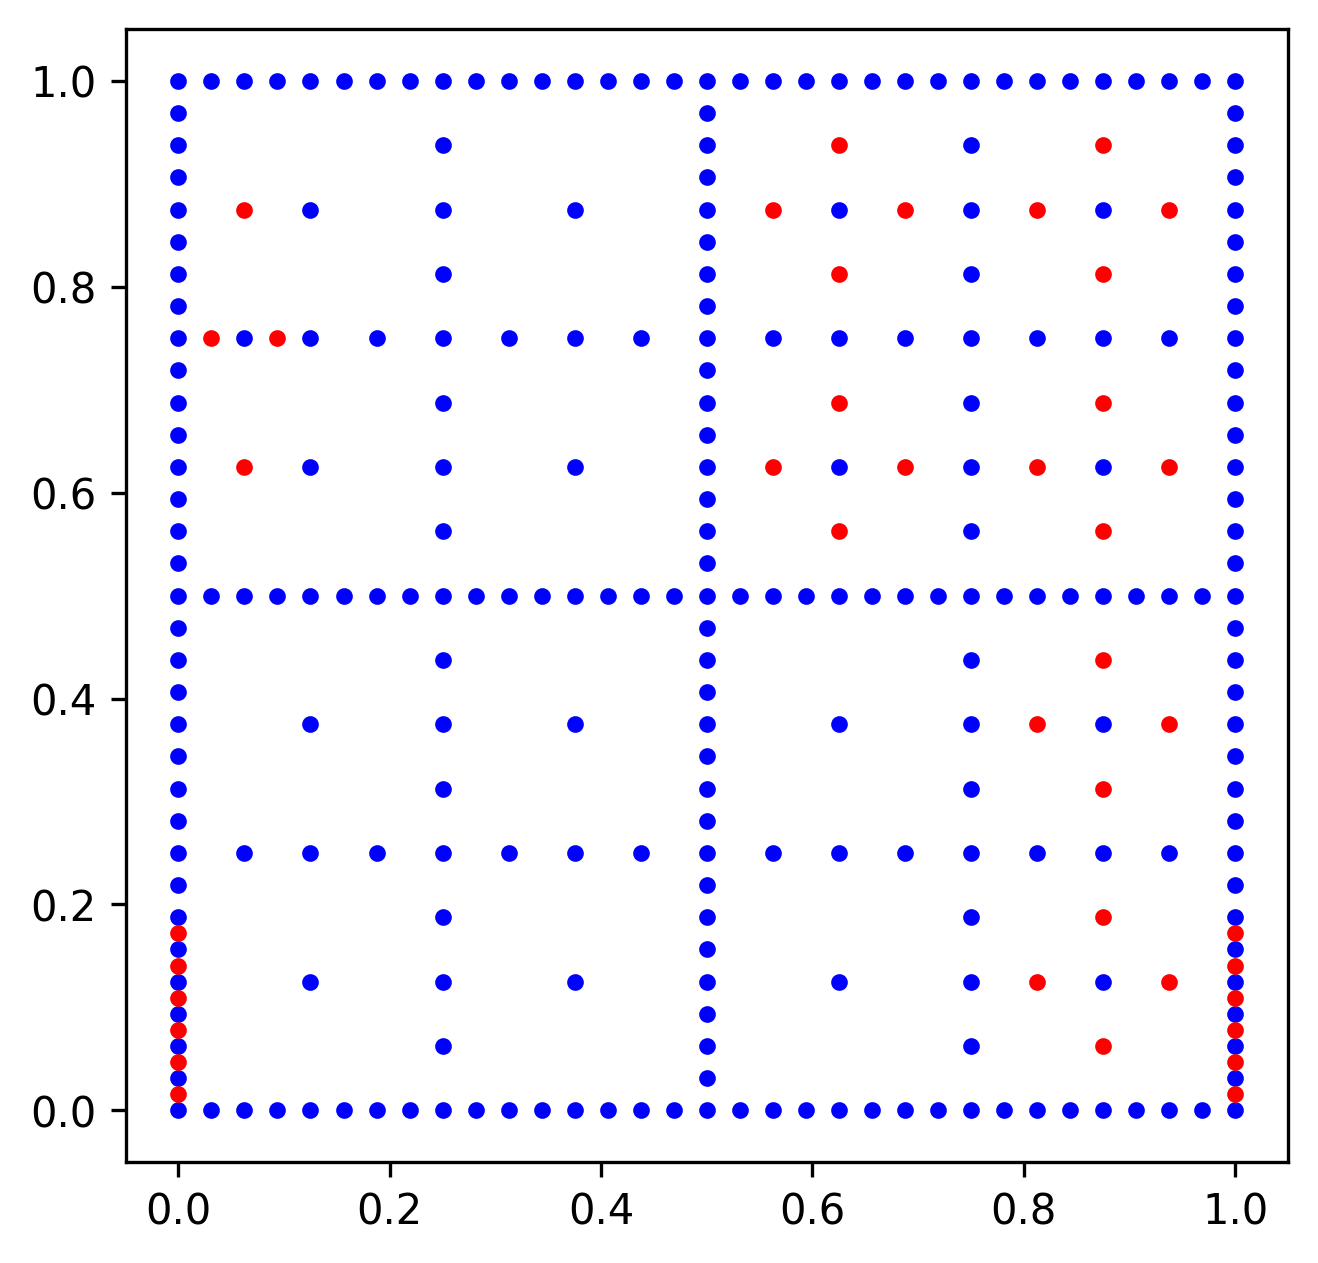

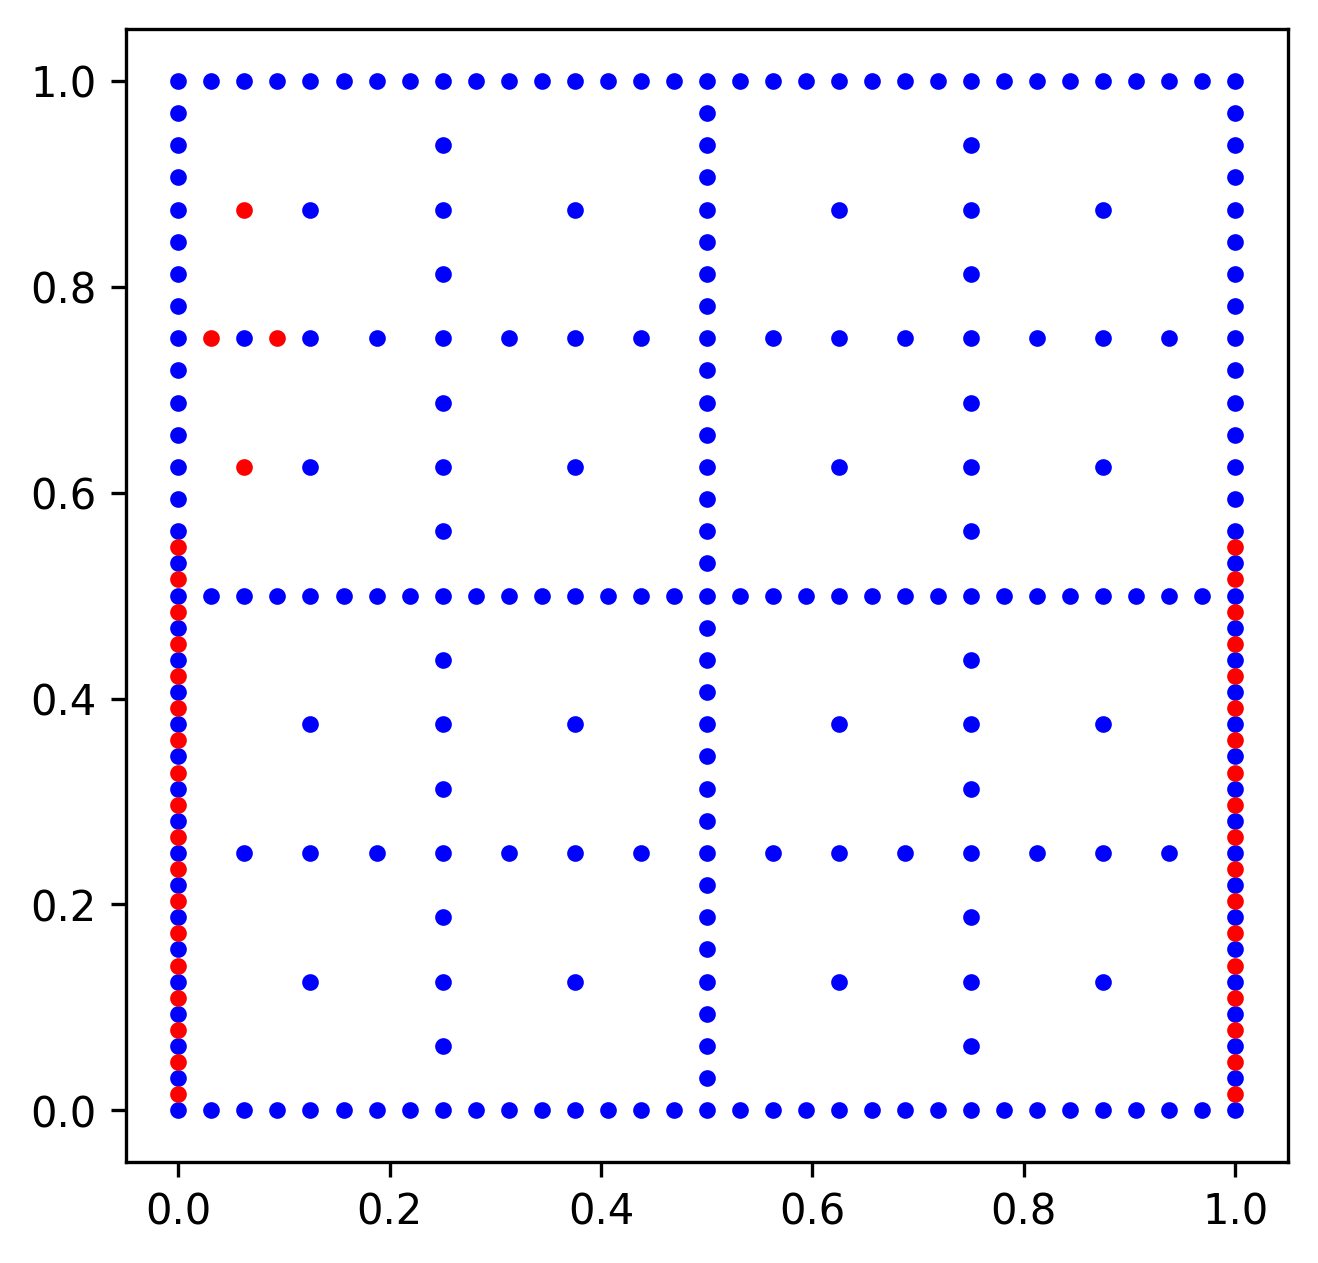

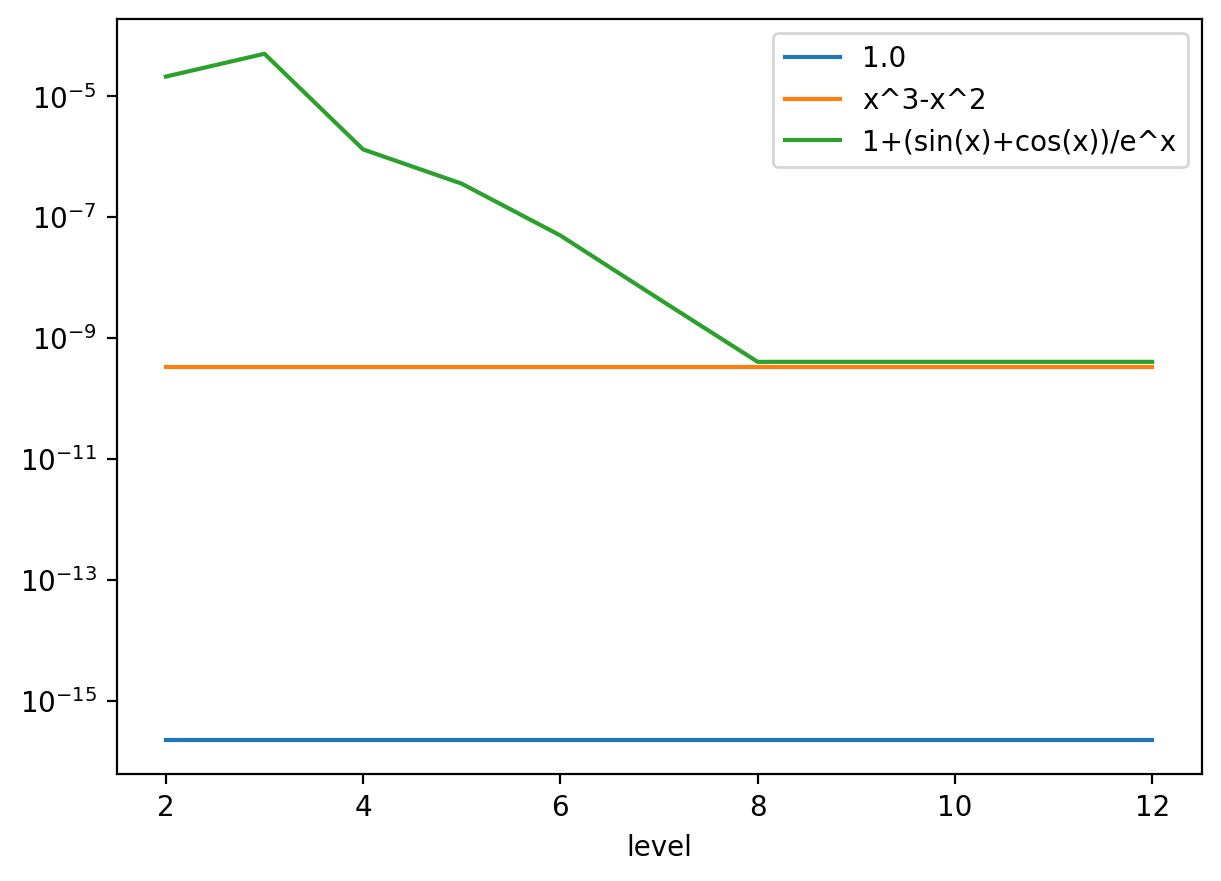

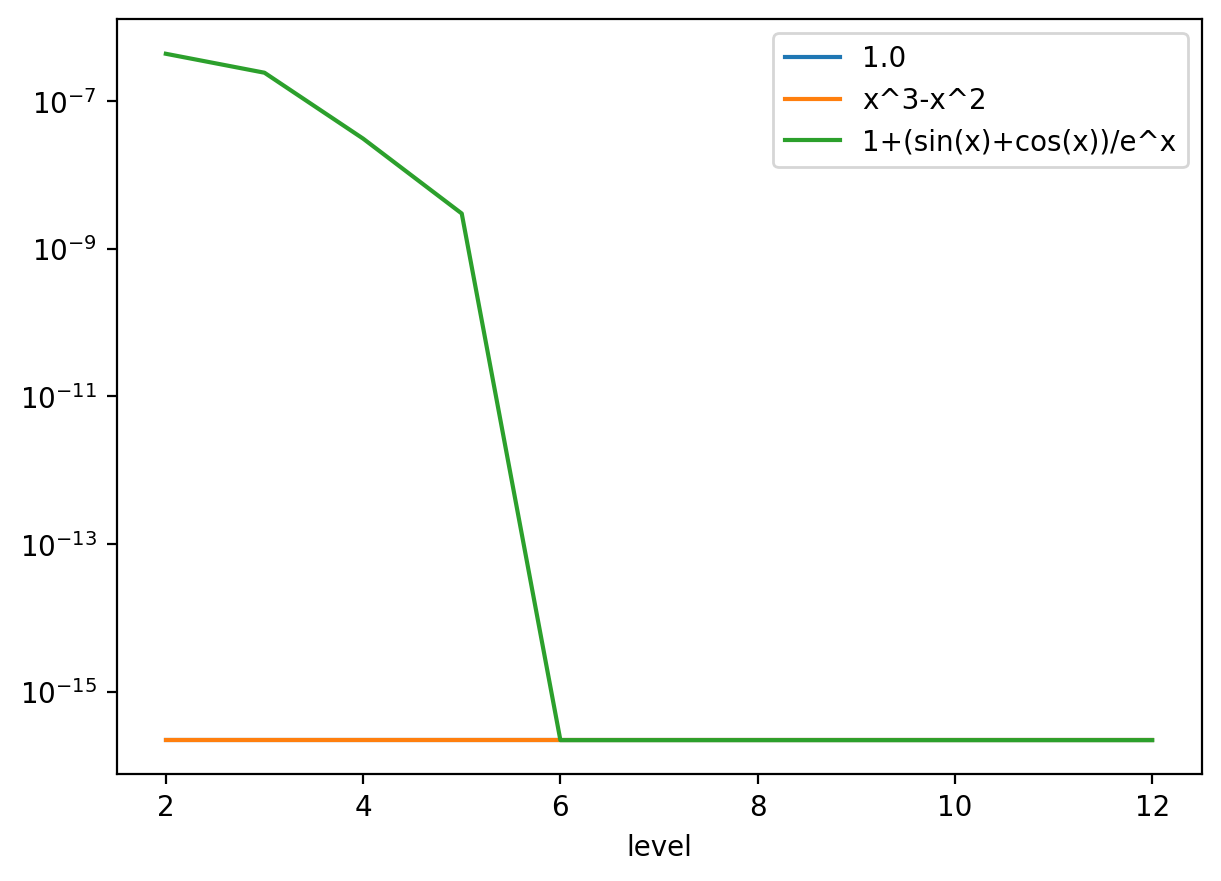

In [27]:
printer('PolyBoundary3')

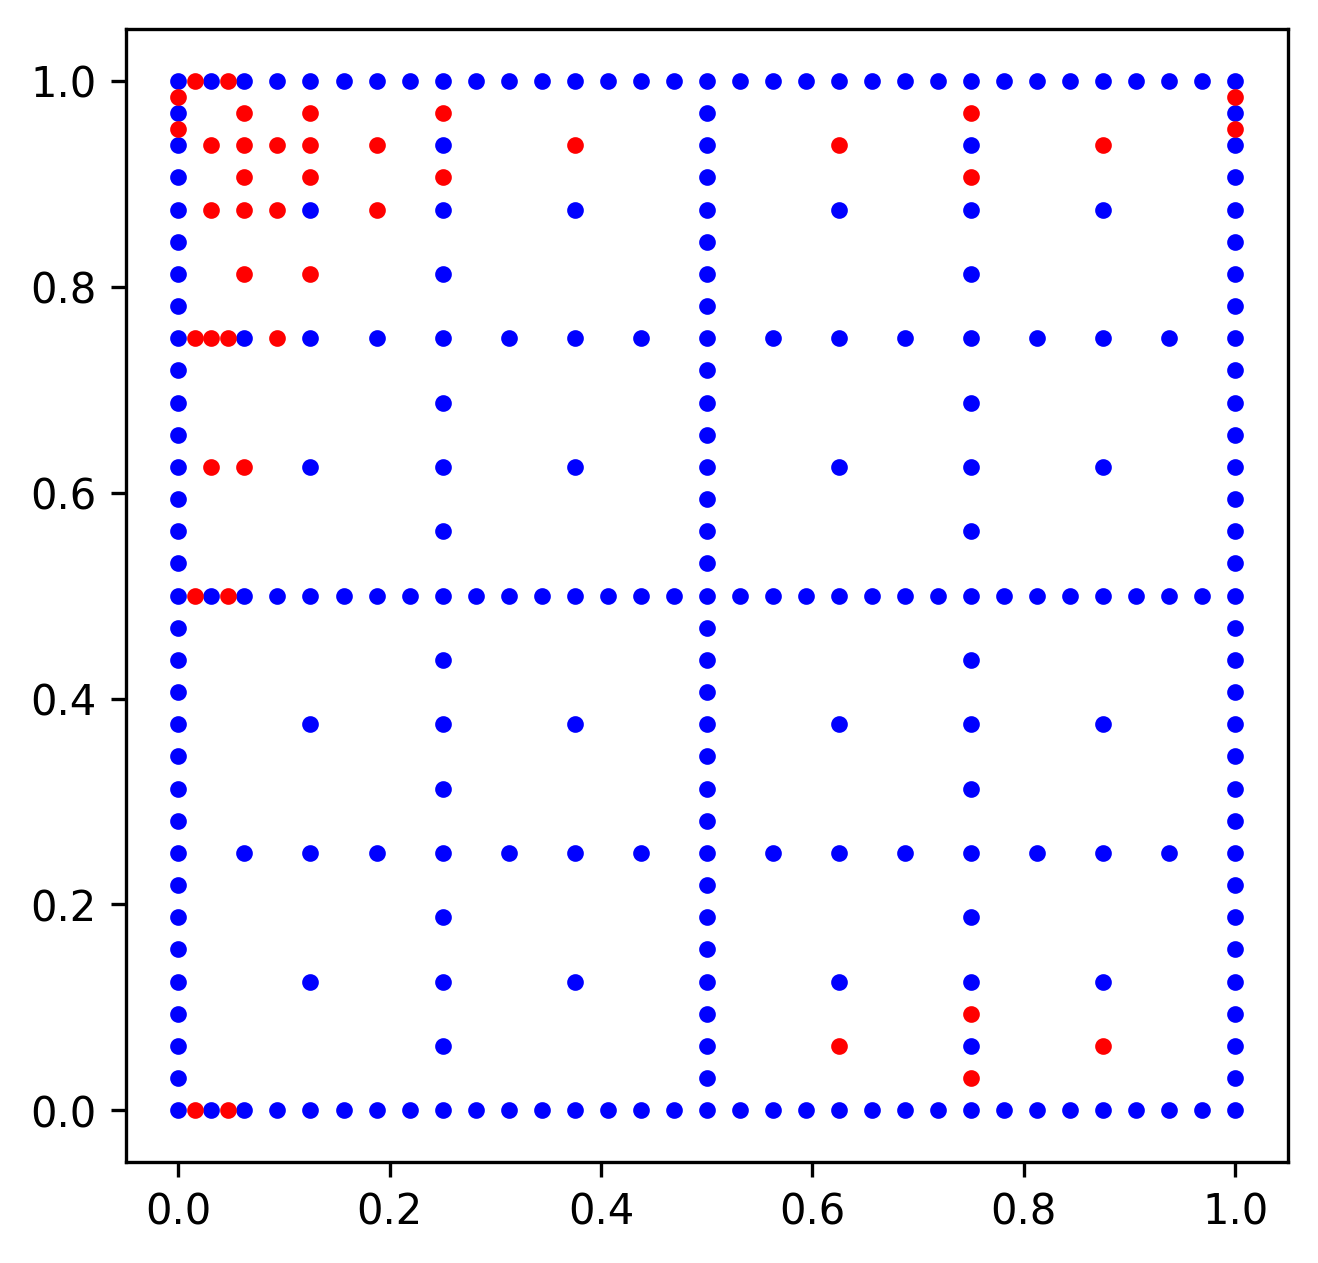

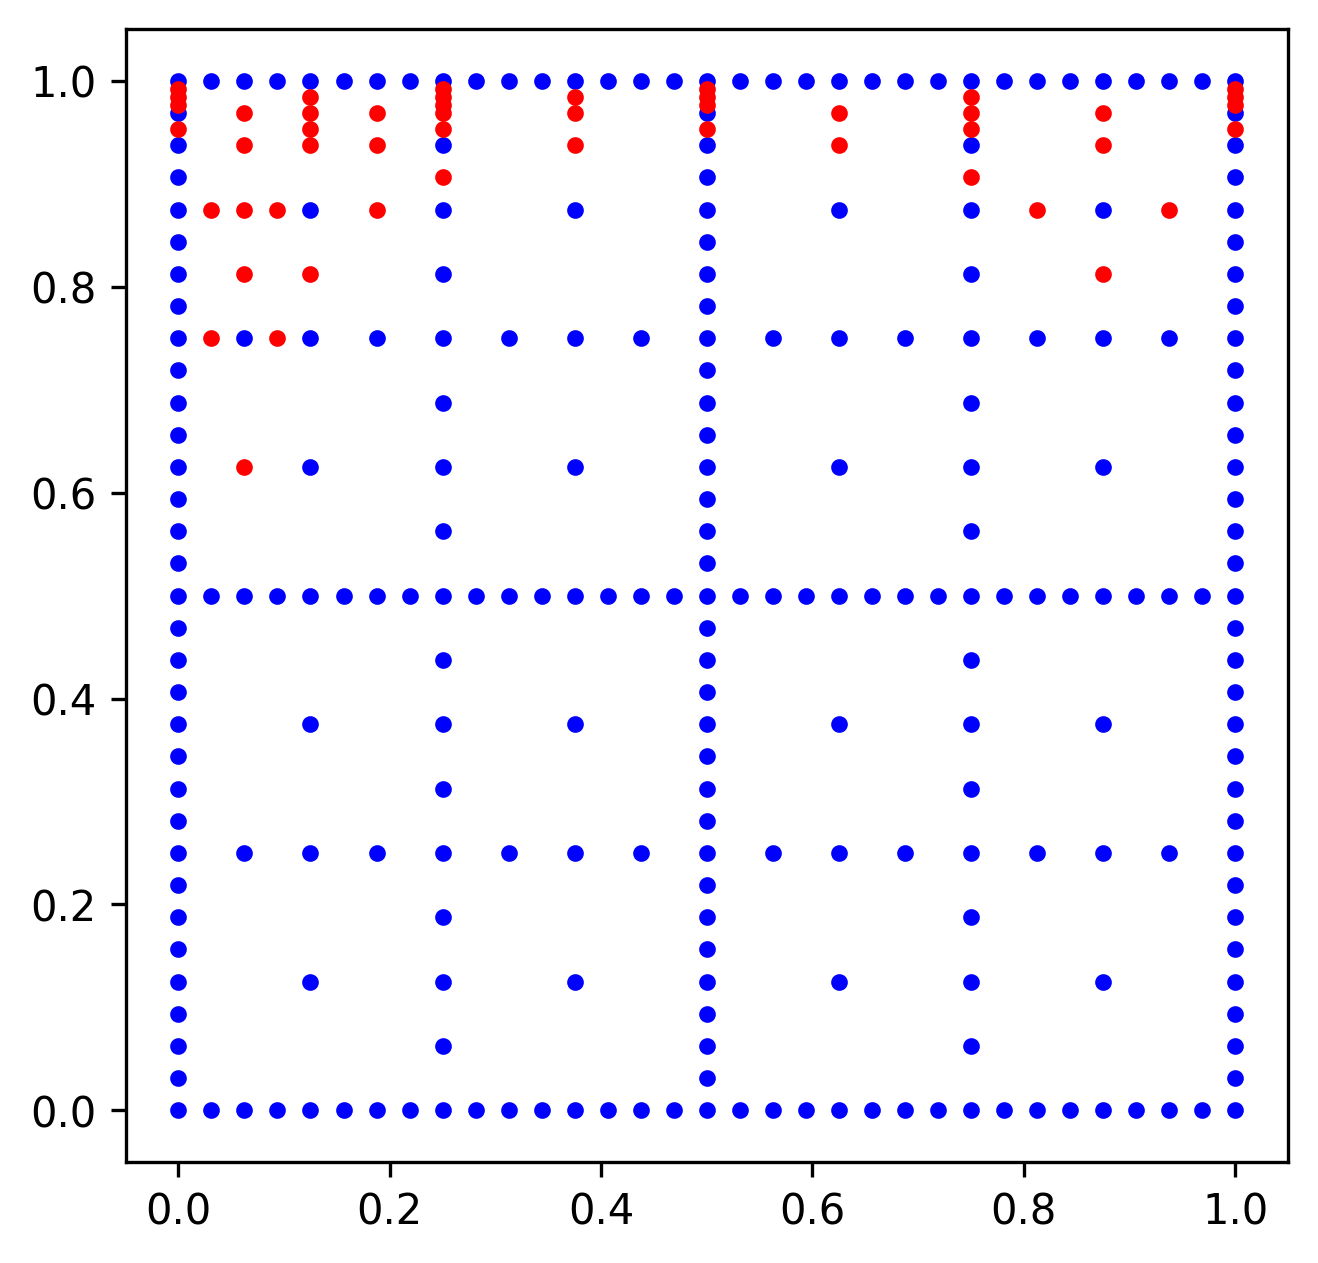

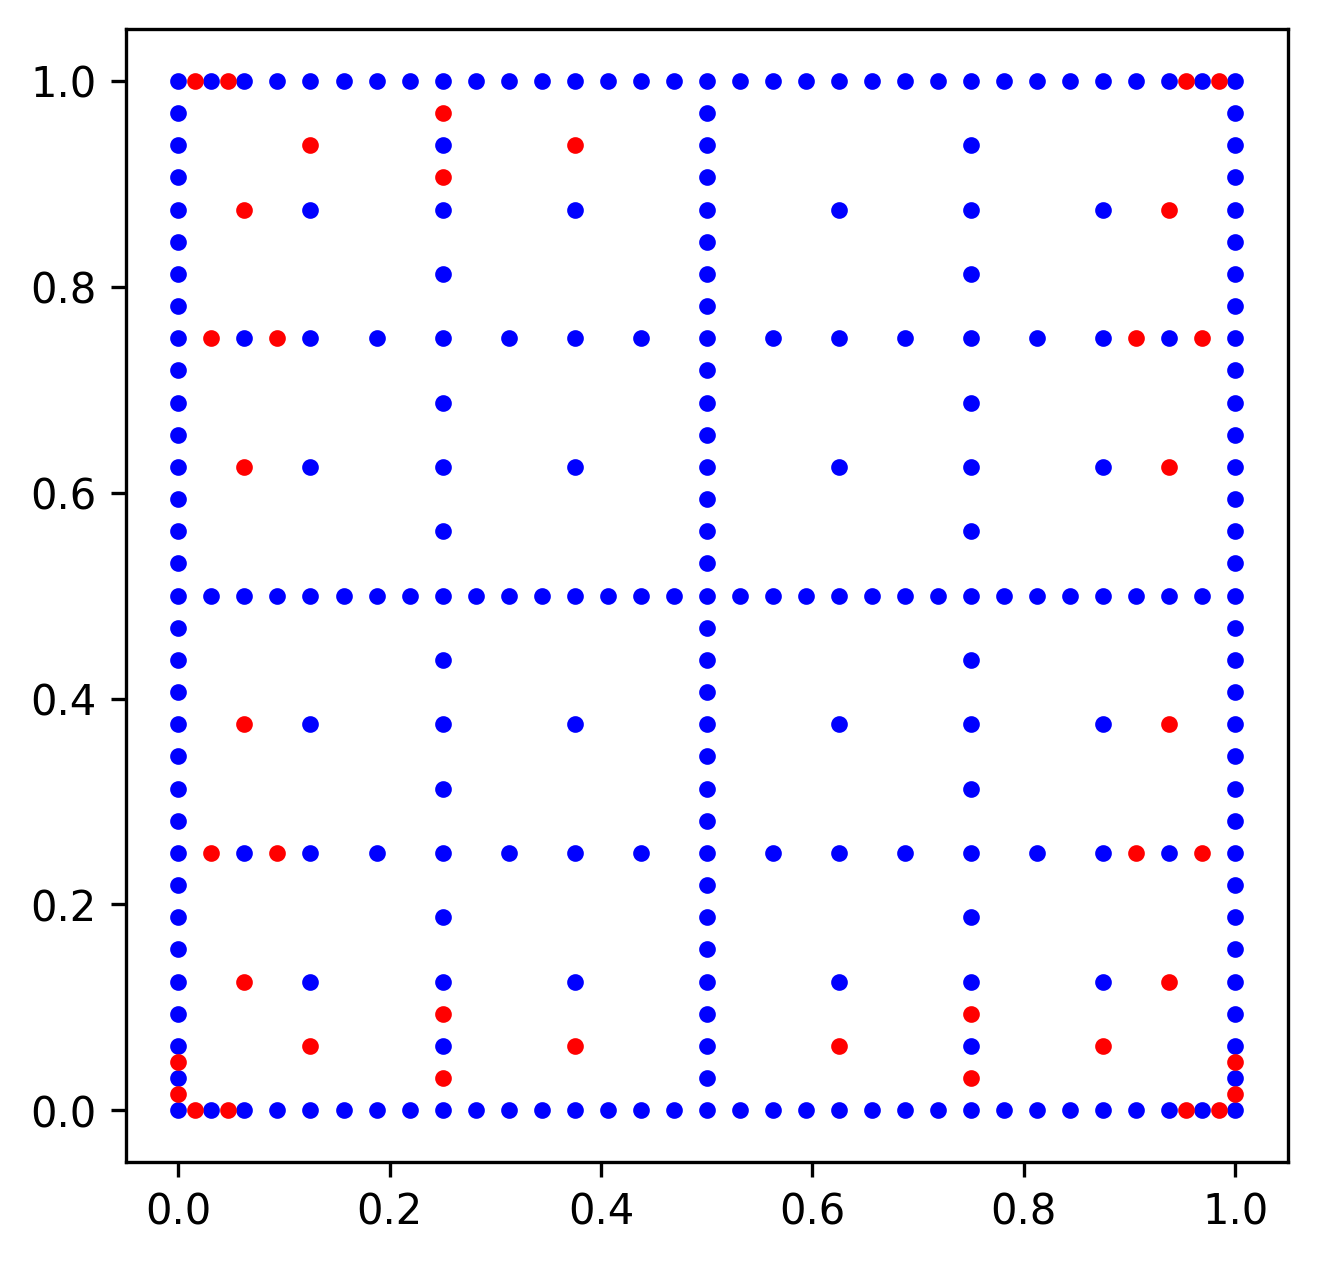

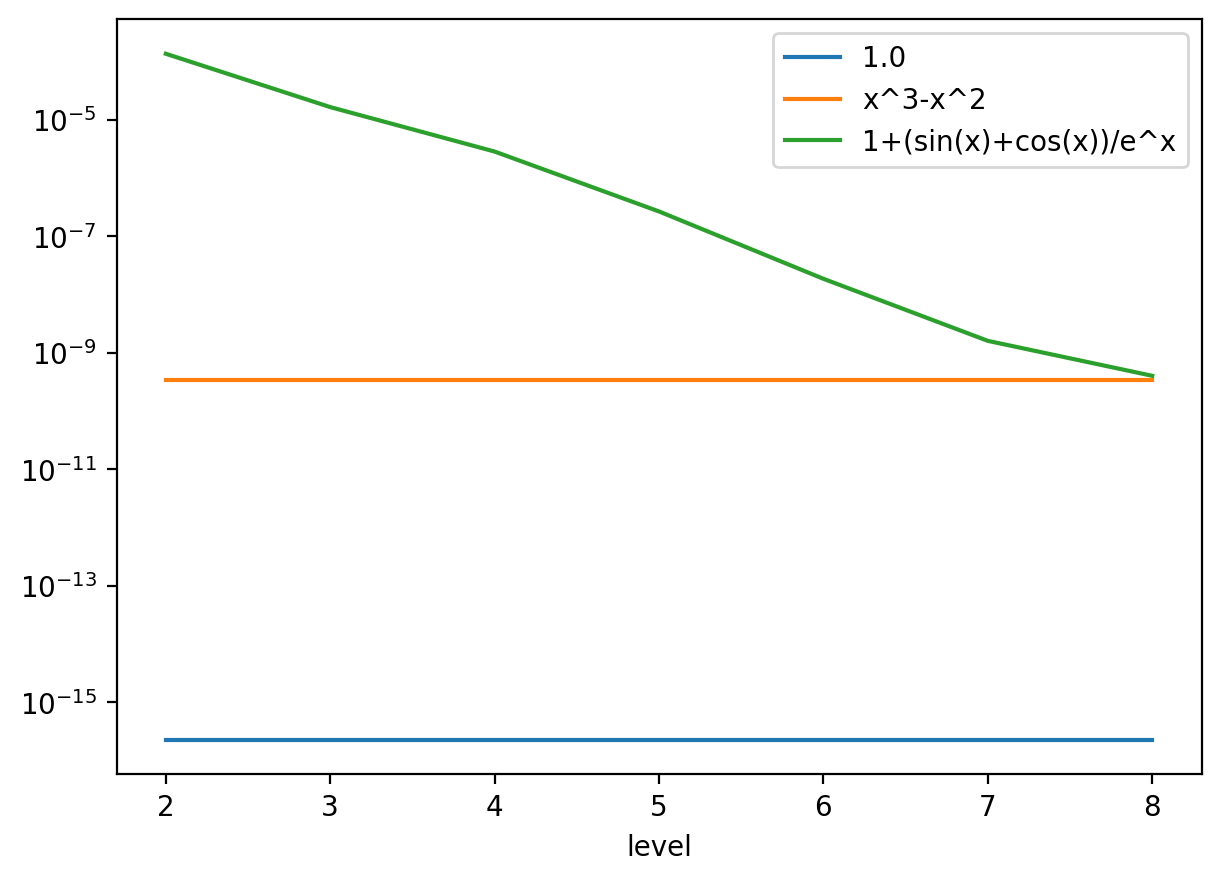

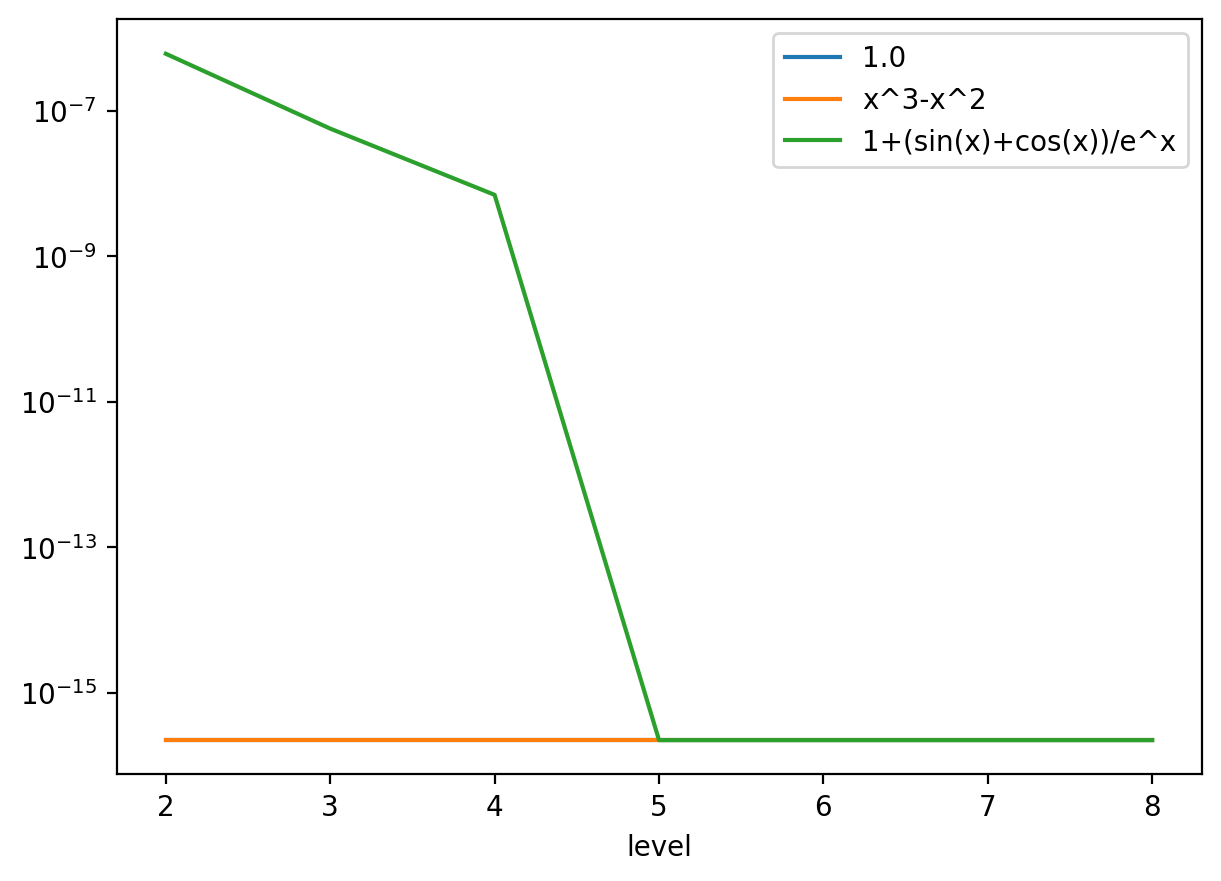

In [3]:
printer('NakBsplineBoundary3')